# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
   os.chdir('drive/MyDrive/DataTeam1/Index3')

Mounted at /content/drive


In [3]:
df = pd.read_csv('IC4WSA.csv') #Dataset file
df.head()

,DATE,IC4WSA
0,1967-01-28,209000
1,1967-02-04,211000
2,1967-02-11,216500
3,1967-02-18,219500
4,1967-02-25,229000


In [4]:
recession = pd.read_csv('../Index7/Recession.csv')
recession.head()

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

#### Preparing data for jobless claim
- change to datetime object **['DATE']**
- create columns
  - moving average **['SMA50']**
  - percent change from previous point(week) **['PCT']**

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
# using .rolling(window).mean() with window size = 50
df['SMA50'] = df['IC4WSA'].rolling(50).mean()
 
df['PCT'] = df.IC4WSA.pct_change()
# removing all the NULL values using dropna() method
df.dropna(inplace=True)
df.head()

,DATE,IC4WSA,SMA50,PCT
49,1968-01-06,215250,227600.0,0.001163
50,1968-01-13,219750,227815.0,0.020906
51,1968-01-20,220250,228000.0,0.002275
52,1968-01-27,215750,227985.0,-0.020431
53,1968-02-03,221250,228020.0,0.025492


#### Preparing data for recession periods
- change to datetime object **['DATE']**
- create lists
  - recession starting points 
  - recession ending points 

In [6]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


#### Plots
- plot raw data
- plot moving average
- plot recession periods in gray areas

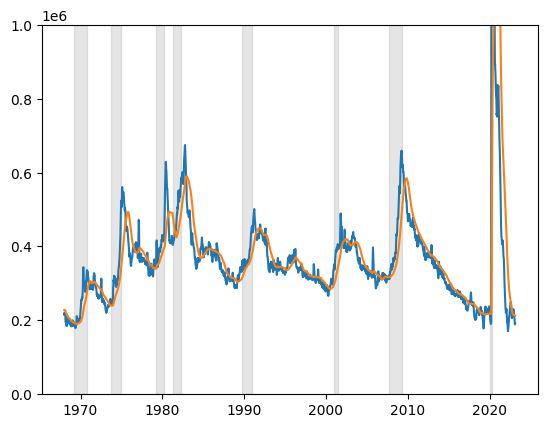

In [7]:
# basic plot for raw data and moving average
# There is an abnormally large peak during 2019-2020 (covid-19).

fig, ax = plt.subplots()
ax.plot(df['DATE'],df['IC4WSA'], label='raw')
ax.plot(df['DATE'],df['SMA50'], label='rolling_50')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.ylim(0,1e6)
plt.show()

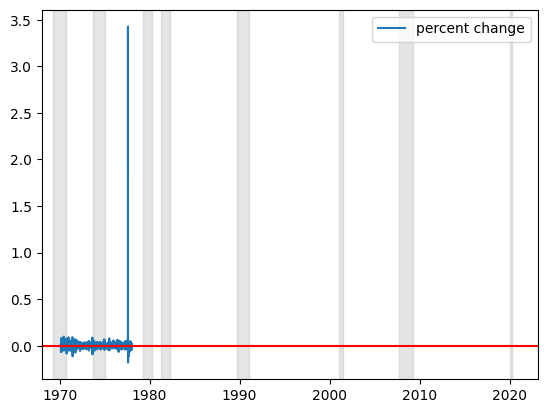

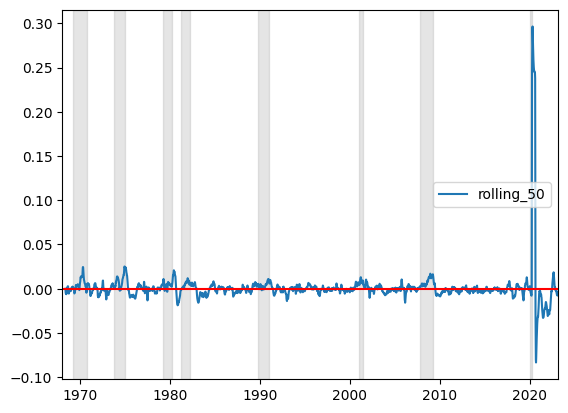

In [8]:
# basic plot for percent change and its moving average
# There is an abnormally large peak during 2019-2020 (covid-19).
# The tendency is a little more noticable. The jobless claim generally increases during regressions.

df['PCT_MA50'] = df['PCT'].rolling(20).mean()

fig, ax = plt.subplots()
ax.plot( df['PCT'], label='percent change')
ax.axhline(0, color='r')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df['DATE'].min(), df['DATE'].max())
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(df['DATE'], df['PCT_MA50'], label='rolling_50')
ax.axhline(0, color='r')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df['DATE'].min(), df['DATE'].max())
plt.legend()
plt.show()

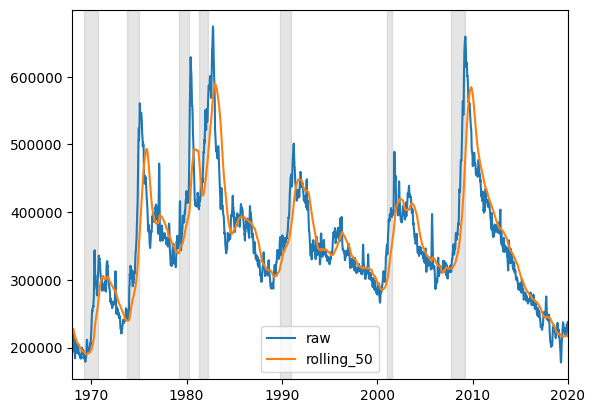

In [9]:
# Before and after the abnormal peak are separating for clearer visualization.
# basic plot for raw data and moving average before the peak

df_beforepeak = df[df['DATE']<'2020-01-20']

fig, ax = plt.subplots()
ax.plot(df_beforepeak['DATE'], df_beforepeak['IC4WSA'], label='raw')
ax.plot(df_beforepeak['DATE'], df_beforepeak['SMA50'], label='rolling_50')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df_beforepeak['DATE'].min(), df_beforepeak['DATE'].max())
plt.legend()
plt.show()

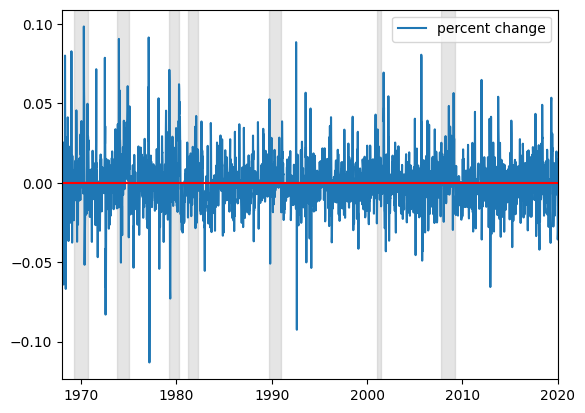

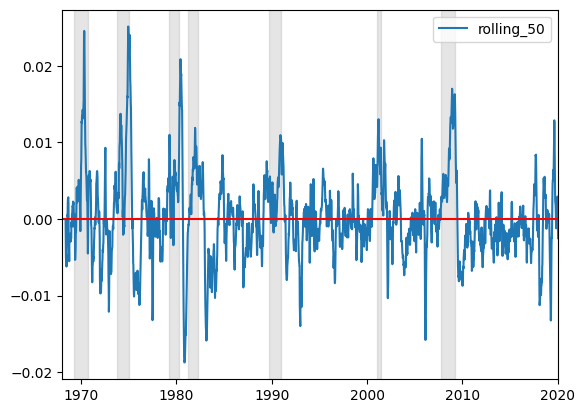

In [10]:
# Before and after the abnormal peak are separating for clearer visualization.
# basic plot for percent change and its moving average before the peak

fig, ax = plt.subplots()
ax.plot(df_beforepeak['DATE'], df_beforepeak['PCT'], label='percent change')
ax.axhline(0, color='r')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df_beforepeak['DATE'].min(), df_beforepeak['DATE'].max())
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(df_beforepeak['DATE'], df_beforepeak['PCT_MA50'], label='rolling_50')
ax.axhline(0, color='r')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df_beforepeak['DATE'].min(), df_beforepeak['DATE'].max())
plt.legend()
plt.show()

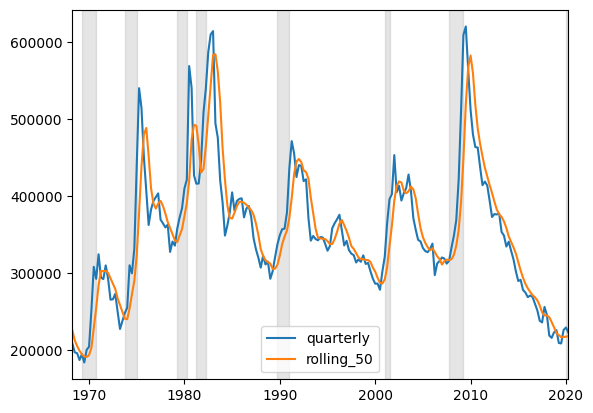

In [11]:
# Before and after the abnormal peak are separating for clearer visualization.
# quarterly resampled plot for raw data and moving average before the peak

df_beforepeak_Q = df_beforepeak.resample('Q', on='DATE').mean()

fig, ax = plt.subplots()
ax.plot(df_beforepeak_Q.index, df_beforepeak_Q['IC4WSA'], label='quarterly')
ax.plot(df_beforepeak_Q.index, df_beforepeak_Q['SMA50'], label='rolling_50')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df_beforepeak_Q.index.min(), df_beforepeak_Q.index.max())
plt.legend()
plt.show()

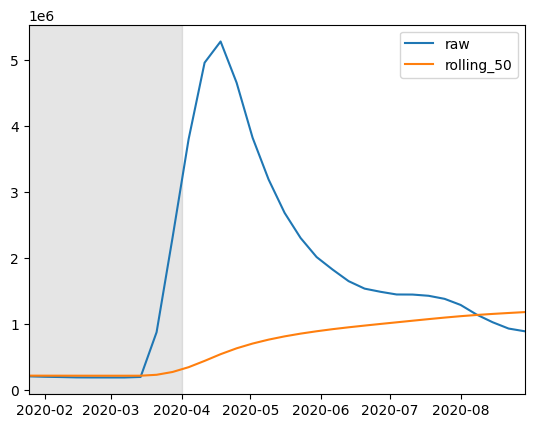

In [12]:
# Before and after the abnormal peak are separating for clearer visualization.
# basic plot for raw data and moving average after the peak
# not quite sure what can be implied from moving average behaving in this manner. Potentially because it averages the peak with non-peak. 

df_peak = df[('2020-09-01'>df['DATE'])&(df['DATE']>='2020-01-20')]

fig, ax = plt.subplots()
ax.plot(df_peak['DATE'], df_peak['IC4WSA'], label='raw')
ax.plot(df_peak['DATE'], df_peak['SMA50'], label='rolling_50')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.set_xlim(df_peak['DATE'].min(), df_peak['DATE'].max())
plt.legend()
plt.show()

In [13]:
df_beforepeak.reset_index(inplace=True)
df_beforepeak.head(7)

,index,DATE,IC4WSA,SMA50,PCT,PCT_MA50
0,49,1968-01-06,215250,227600.0,0.001163,NaN
1,50,1968-01-13,219750,227815.0,0.020906,NaN
2,51,1968-01-20,220250,228000.0,0.002275,NaN
3,52,1968-01-27,215750,227985.0,-0.020431,NaN
4,53,1968-02-03,221250,228020.0,0.025492,NaN
5,54,1968-02-10,218250,227805.0,-0.013559,NaN
6,55,1968-02-17,212000,226995.0,-0.028637,NaN


#### Seasonality

Try to find some kind of seasonal/periodic behavior by using statsmodels.

The period is 52 because the unit for this is weekly. And there are 52 weeks in a year.

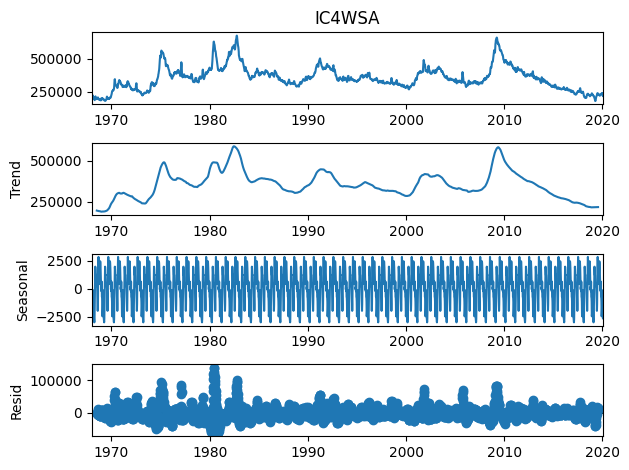

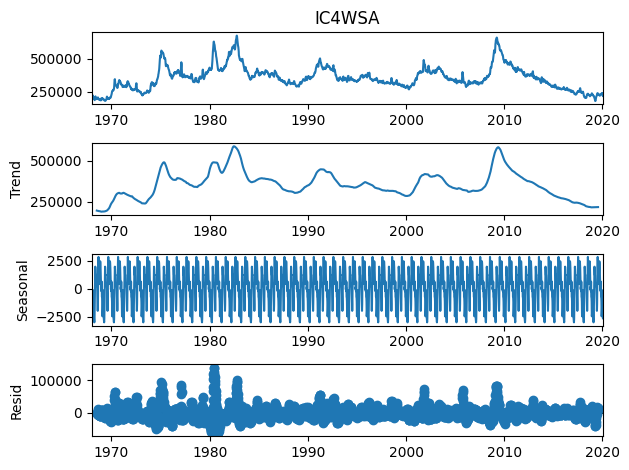

In [14]:
# It shows the plot twice for some reason. But the result consists of only four graphs
# For x-axis is the amount of weeks counted from the first week of year 1968
# Since additive model is used here, Raw data = Trend + Seasonal + Residual

# Raw data
# Trend (Average trend of data)
# Seasonal (Seasonal behavior)
# Residual (Noise)

# Some seasonalilty is found, but it should not be significant.
# Because seasonal factor is on the scale of 3,000. However, the trend is on the scale of 500,000. The residual is also on a much larger scale compared to seasonal behavior.
decompose_df = df_beforepeak.copy().set_index('DATE')
result = seasonal_decompose(decompose_df['IC4WSA'], model='additive')
result.plot()

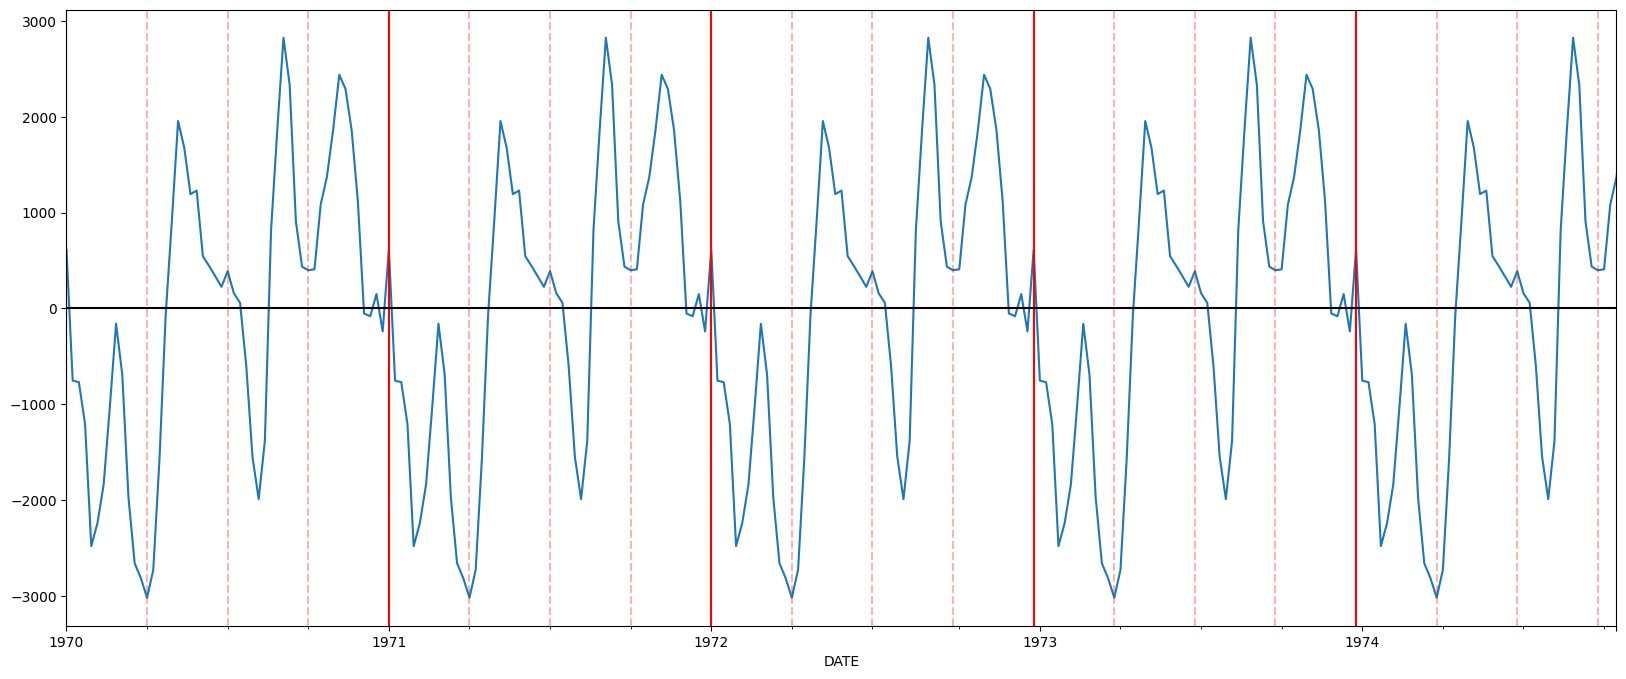

In [15]:
# Take a closer look at seasonal behavior (blue line) just in case
# solid red line = yearly
# dotted red line = quarterly (Month 3, 6, 9)
# peak around Month 4, 8, 10 (not sure about the reason)

fig, ax = plt.subplots()
result.seasonal.plot(figsize=(20,8))
for i in range(0,250,13):
  ax.axvline(i, color='red', linestyle='--', alpha=0.3)
for i in range(0,250,52):
  ax.axvline(i, color='red')
ax.axhline(0, color='black')
plt.xlim(0,250)
plt.show()